Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [166]:
# Creating new dataframe df from dictionary data

import pandas as pd
import numpy as np
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data , columns = ("animal","age","visits","priority"), index = ('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'))
df 

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**2.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [155]:
df.describe() # Gives summary statistics

,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


**3.** Return the first 3 rows of the DataFrame `df`.

In [156]:
df.head(3) # Gives first 3 rows

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


 **4.** Display the 'animal' and 'age' columns from the DataFrame `df`

In [157]:
df[["animal","age"]] # displays animal and age columns from dataframe

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**5.** Display the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']'

In [158]:
df_1 = df[["animal","age"]] # Selects the respective columns
df_1.loc[["c","d","h"]] # Rows  [3,4,8] are indexed as ["c","d","h"]


,animal,age
c,snake,0.5
d,dog,NaN
h,cat,NaN


**6.** Select only the rows where the number of visits is greater than 3.

In [159]:
df1 = df[df["visits"]>3] # df of rows with visits > 3
df1

,animal,age,visits,priority


**7.** Select the rows where the age is missing, i.e. it is `NaN`.

In [160]:
df2 = df.loc[df["age"].isnull()] # retrives rows that has null values
df2 

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


**8.** Select the rows where the animal is a cat *and* the age is less than 3.

In [161]:
df3 = df[df["animal"] == "cat"]
df3[df3["age"] < 3]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**9.** Select the rows where the age is between 2 and 4 (inclusive)

In [172]:
df_newdf = df.dropna()
df_newdf # Data frame with NaN values dropped

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
i,dog,7.0,2,no
j,dog,3.0,1,no


In [179]:
df_newdf.loc[(df_newdf["age"] >= 2) & (df_newdf["age"] <= 4)] # All anumals having age between 2 and 4

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


**10.** Change the age in row 'f' to 1.5.

In [185]:
df.loc[["f"],["age"]] = 1.5
df.loc["f"]

animal      cat
age         1.5
visits        3
priority     no
Name: f, dtype: object

**11.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

In [62]:
df["visits"].sum()

19

**12.** Calculate the mean age for each different animal in `df`.

In [67]:
g = df.groupby("animal")["age"].mean()
g # Grouped animals with their mean age

animal
cat      2.5
dog      5.0
snake    2.5
Name: age, dtype: float64

**13.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [115]:
data_add = {'animal': 'cat',
        'age': 3,
        'visits': 2,
        'priority':'yes'}
df_newdata = pd.DataFrame(data_add, columns = ("animal","age","visits","priority"),index=["k"])

In [120]:
df_update = pd.concat([df, df_newdata], axis = 0)
df_update # Updated data

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [129]:
df = df_update.drop(index =["k"])
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**14.** Count the number of each type of animal in `df`.

In [96]:
gby = df["animal"].value_counts()
gby

animal
cat      4
dog      4
snake    2
Name: count, dtype: int64

**15.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [192]:
df_sorted = df.sort_values(by=["age","visits"],ascending= [False,True])
df_sorted


,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


**16.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [135]:
df1 = df.replace(to_replace = 'yes', value = True) 
df1.replace(to_replace = 'no', value = False)

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,2.0,3,False
g,snake,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


**17.** In the 'animal' column, change the 'snake' entries to 'python'.

In [136]:
df1.replace(to_replace = 'snake', value = 'python')

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,python,0.5,2,no
d,dog,NaN,3,True
e,dog,5.0,2,no
f,cat,2.0,3,no
g,python,4.5,1,no
h,cat,NaN,1,True
i,dog,7.0,2,no
j,dog,3.0,1,no


**18.** Load the ny-flights dataset to Python

In [198]:
file = pd.read_csv("C:\\Users\\kiran\\Downloads\\ny-flights.csv")
file

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20812,2014-01-31 00:00:00,UA,19977,N54711,1253,ROC,ORD,801.0,-4.0,908.0,4.0,0.0,2014-01-31 09:08:00,2014-01-31 08:01:00
20813,2014-01-31 00:00:00,UA,19977,N77525,1429,LGA,CLE,1522.0,-10.0,1649.0,-31.0,0.0,2014-01-31 16:49:00,2014-01-31 15:22:00
20814,2014-01-31 00:00:00,UA,19977,N37293,1456,LGA,IAH,719.0,-6.0,1006.0,-20.0,0.0,2014-01-31 10:06:00,2014-01-31 07:19:00
20815,2014-01-31 00:00:00,UA,19977,N24729,1457,LGA,IAH,852.0,7.0,1156.0,-6.0,0.0,2014-01-31 11:56:00,2014-01-31 08:52:00


**19.** Which airline ID is present maximum times in the dataset

In [214]:
max_id = file["airline_id"].value_counts()
max_id.head(1)


airline_id
20409    4902
Name: count, dtype: int64

**20.** Draw a plot between dep_delay and arr_delay

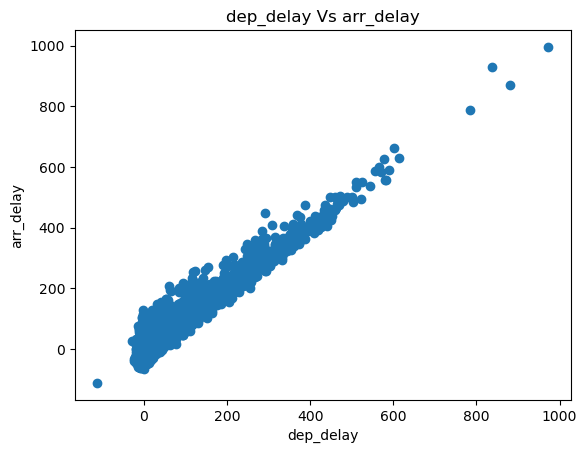

In [227]:
import matplotlib.pyplot as plt
file.dropna()
x = np.array(file["dep_delay"])
y = np.array(file["arr_delay"])
plt.scatter(x,y)
plt.xlabel("dep_delay")
plt.ylabel("arr_delay")
plt.title('dep_delay Vs arr_delay')
plt.show()

### ny_flights Dataset Tasks:

In [ ]:
# Reading data from csv

In [228]:
file = pd.read_csv("C:\\Users\\kiran\\Downloads\\ny-flights.csv")
file

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20812,2014-01-31 00:00:00,UA,19977,N54711,1253,ROC,ORD,801.0,-4.0,908.0,4.0,0.0,2014-01-31 09:08:00,2014-01-31 08:01:00
20813,2014-01-31 00:00:00,UA,19977,N77525,1429,LGA,CLE,1522.0,-10.0,1649.0,-31.0,0.0,2014-01-31 16:49:00,2014-01-31 15:22:00
20814,2014-01-31 00:00:00,UA,19977,N37293,1456,LGA,IAH,719.0,-6.0,1006.0,-20.0,0.0,2014-01-31 10:06:00,2014-01-31 07:19:00
20815,2014-01-31 00:00:00,UA,19977,N24729,1457,LGA,IAH,852.0,7.0,1156.0,-6.0,0.0,2014-01-31 11:56:00,2014-01-31 08:52:00


In [ ]:
# Summary Statistics

In [229]:
file.describe()

,airline_id,fl_num,dep_time,dep_delay,arr_time,arr_delay,cancelled
count,20817.000000,20817.000000,18462.000000,18462.000000,18412.000000,18383.000000,20817.00000
mean,20109.614882,1826.098813,1319.991713,22.772127,1493.698566,21.380732,0.11505
std,370.715209,1548.188325,479.999940,59.766152,518.851657,64.605591,0.31909
min,19393.000000,1.000000,1.000000,-112.000000,1.000000,-112.000000,0.00000
25%,19790.000000,472.000000,858.000000,-4.000000,1110.750000,-12.000000,0.00000
50%,20355.000000,1457.000000,1336.000000,0.000000,1519.000000,3.000000,0.00000
75%,20409.000000,2701.000000,1720.000000,22.000000,1923.000000,28.000000,0.00000
max,21171.000000,6258.000000,2400.000000,973.000000,2400.000000,996.000000,1.00000


In [ ]:
# Find shape size and dimension

In [232]:
file.size

291438

In [234]:
file.ndim

2

In [233]:
file.shape

(20817, 14)

In [ ]:
# Checking for data types and null values

In [230]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20817 entries, 0 to 20816
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fl_date         20817 non-null  object 
 1   unique_carrier  20817 non-null  object 
 2   airline_id      20817 non-null  int64  
 3   tail_num        20512 non-null  object 
 4   fl_num          20817 non-null  int64  
 5   origin          20817 non-null  object 
 6   dest            20817 non-null  object 
 7   dep_time        18462 non-null  float64
 8   dep_delay       18462 non-null  float64
 9   arr_time        18412 non-null  float64
 10  arr_delay       18383 non-null  float64
 11  cancelled       20817 non-null  float64
 12  arr             18412 non-null  object 
 13  dep             18462 non-null  object 
dtypes: float64(5), int64(2), object(7)
memory usage: 2.2+ MB


In [ ]:
#Finding null values


In [236]:
file.isnull().sum()

fl_date              0
unique_carrier       0
airline_id           0
tail_num           305
fl_num               0
origin               0
dest                 0
dep_time          2355
dep_delay         2355
arr_time          2405
arr_delay         2434
cancelled            0
arr               2405
dep               2355
dtype: int64

In [ ]:
# Removing null data 

In [237]:
file.dropna()

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20812,2014-01-31 00:00:00,UA,19977,N54711,1253,ROC,ORD,801.0,-4.0,908.0,4.0,0.0,2014-01-31 09:08:00,2014-01-31 08:01:00
20813,2014-01-31 00:00:00,UA,19977,N77525,1429,LGA,CLE,1522.0,-10.0,1649.0,-31.0,0.0,2014-01-31 16:49:00,2014-01-31 15:22:00
20814,2014-01-31 00:00:00,UA,19977,N37293,1456,LGA,IAH,719.0,-6.0,1006.0,-20.0,0.0,2014-01-31 10:06:00,2014-01-31 07:19:00
20815,2014-01-31 00:00:00,UA,19977,N24729,1457,LGA,IAH,852.0,7.0,1156.0,-6.0,0.0,2014-01-31 11:56:00,2014-01-31 08:52:00
